# HEP Software Training: Learn Programming with Python
## Chapter 6: Analyzing Data from Multiple Files

Created by: [Hisyam Athaya](https://athayahisyam.github.io/)  
Learning portfolio based on [SWCarpentry Programming with Python: Python Fundamentals](https://swcarpentry.github.io/python-novice-inflammation/)  
Visit [HEP Software Training](https://hepsoftwarefoundation.org/training/curriculum.html) for more information.

In this chapter we will learn how do we apply same operations on so many different files, using a library function to get a list of filenames that match a wildcard pattern, write a `for` loop to process multiple files.

The library `glob` will help to get a list of all files in `data` directory whose names start and end with specific characters.

In [1]:
import glob

# necessary libraries for data analysis

import numpy as np
import matplotlib.pyplot as plt

`glob` library contains `glob` function, that finds files and directories whose names match a pattern. We provide thos pattern as strings: the character `*` matches zero or more characters, while `?` matches any one character.

In [3]:
print(sorted(glob.glob('data/inflammation*.csv')))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


Here, we can loop over to do something with each filename in turn. In our case, the "something" we want to do is generate a set of plots for each files in our inflammation dataset.

data/inflammation-01.csv


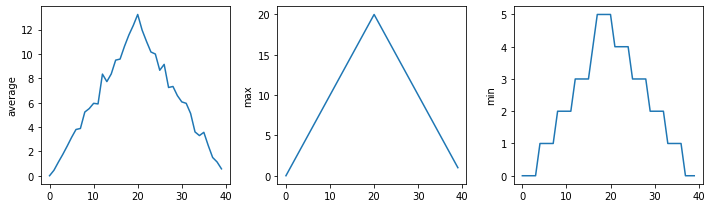

data/inflammation-02.csv


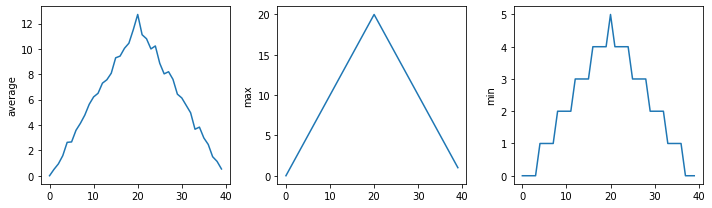

data/inflammation-03.csv


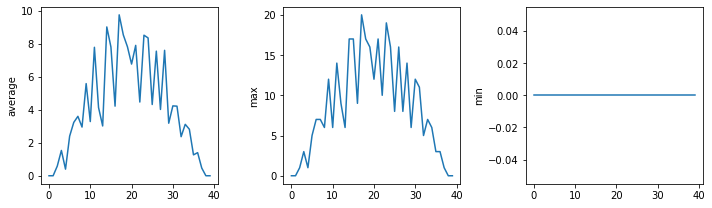

In [9]:
filenames = sorted(glob.glob('data/inflammation*.csv')) # creating a list of filenames
filenames = filenames[0:3] # slicing the list so that only first 3 selected
for filename in filenames:
    print(filename)
    
    data = np.loadtxt(fname = filename, delimiter=',') # load data each loop
    
    fig = plt.figure(figsize=(10.0, 3.0)) # size of the figures
    
    axes1 = fig.add_subplot(1,3,1)
    axes2 = fig.add_subplot(1,3,2)
    axes3 = fig.add_subplot(1,3,3)
    
    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))
    
    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))
    
    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))
    
    fig.tight_layout()
    plt.show()

The data acquired from first and second trial show no significant changes: the mean show similar noisy rise and falls, the maxima show same linear rise and fall, and the minima show same staircase structure.  
  
However, the third database shows much noisier average and maxima plots that are far less suspicious than the first two datasets, however, the minima is consistently zero across every day of the trial.

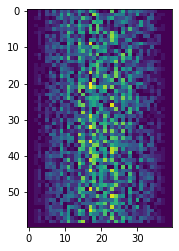

In [2]:
# Heat map for third trial data
# read data

heat_data = np.loadtxt(fname = 'data/inflammation-03.csv', delimiter=',')

# create heat map

img = plt.imshow(heat_data)
plt.show()

From the heat map we can see that the third trial data had more variance scattered in their average and maxima. However, as the graph shown before, the minima is consistently zero everyday of the trial. From the heatmap, we can see that zero values sporadically distributed across all paitents and days of the clinical trial. This suggest there were potential issues with data collection throughout trial. In addition, we can see that the last patient in the study didnt have any inflammation flare ups at all throughout the trial (see the most lower part of the diagram), suggesting they did not have any athritis.

Assignment: Plot the difference between the average inflammations reported in the first and second database.

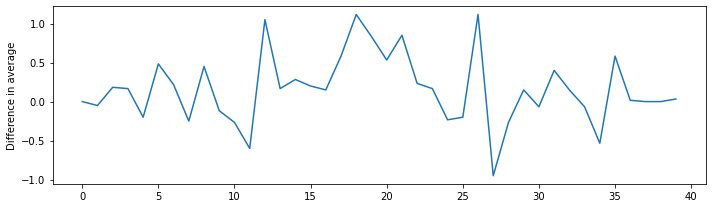

In [4]:
# insert data to the variables
# diff() -> substract?
# insert into image

filenames = sorted(glob.glob('data/inflammation*.csv'))

data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

plt.ylabel('Difference in average')
plt.plot(np.mean(data0, axis=0) - np.mean(data1, axis=0))

fig.tight_layout()
plt.show()